Script to intentionally overfit a variational autoencoder to our training data.

In [2]:
#high level modules
import os
import sys
import imp
import numpy as np
import pandas as pd
import pickle

# ml/ai modules
import tensorflow as tf
# Let's import some different things we will use to build the neural network
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Softmax

# import custom modules
this_dir = "/Users/steeleb/Documents/GitHub/ATS-ML-Fall2023/"
imp.load_source("settings",os.path.join(this_dir,"OutlierDetection/settings.py"))
from settings import settings
imp.load_source("tvt", os.path.join(this_dir, "02_preprocessing_outliers.py"))
from tvt import train1, val1, train2, val2, train3, val3, train4, val4, train5, val5, train6, val6
imp.load_source("architecture", os.path.join(this_dir, "OutlierDetection/architecture.py"))
from architecture import Sampling, build_encoder, build_decoder, latent_loss, VAE, compile_model
imp.load_source("universals", os.path.join(this_dir, "universal_functions.py"))
from universals import save_to_pickle, get_features_labels


/var/folders/x8/v7bmckc139v2dqcm04jgfjlr0000gn/T/ipykernel_49517/3920096871.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


For the VAE, we are actualling including all features, including what we would classically use a label. This is because the label value is as important (maybe more?) than the other values. 

We'll drop feature and date...

In [3]:
train1 = train1.drop(["feature", "date"], axis=1)
val1 = val1.drop(["feature", "date"], axis=1)
train2 = train2.drop(["feature", "date"], axis=1)
val2 = val2.drop(["feature", "date"], axis=1)
train3 = train3.drop(["feature", "date"], axis=1)
val3 = val3.drop(["feature", "date"], axis=1)
train4 = train4.drop(["feature", "date"], axis=1)
val4 = val4.drop(["feature", "date"], axis=1)
train5 = train5.drop(["feature", "date"], axis=1)
val5 = val5.drop(["feature", "date"], axis=1)
train6 = train6.drop(["feature", "date"], axis=1)
val6 = val6.drop(["feature", "date"], axis=1)


Check shapes

In [4]:
train1.shape[1:], val1.shape[1:]

((33,), (33,))

And train the models!

In [5]:

tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(settings["overfit"]["random_seed"])

# define the early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
  monitor="loss", 
  patience=settings["overfit"]["patience"], 
  restore_best_weights=True, 
  mode="auto"
)

## LOO 1
encoder1 = build_encoder(train1, settings["overfit"])
decoder1 = build_decoder(train1, settings["overfit"])

model_1 = VAE(encoder1, decoder1)

model_1 = compile_model(
  model_1, 
  settings['overfit']
)

# train the model via model.fit
history_1 = model_1.fit(
  np.array(train1),
  epochs=settings['overfit']["max_epochs"],
  batch_size=settings['overfit']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val1)],
  callbacks=[early_stopping_callback],
  verbose=1
)



Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout (Dropout)              (None, 33)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 20)           680         ['dropout[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           210         ['dense[0][0]']                  
            

2023-12-13 15:56:47.519127: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-13 15:56:47.519255: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5000


2023-12-13 15:56:47.745498: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-13 15:56:48.070717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 65.2301 - reconstruction_loss: 62.6237 - kl_loss: 0.0013

2023-12-13 15:56:48.719207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 53ms/step - loss: 65.0130 - reconstruction_loss: 62.6237 - kl_loss: 0.0013 - val_loss: 53.1692 - val_reconstruction_loss: 53.1689 - val_kl_loss: 3.3652e-04
Epoch 2/5000
11/11 [==============================] - 0s 12ms/step - loss: 63.3924 - reconstruction_loss: 62.5638 - kl_loss: 2.0248e-04 - val_loss: 53.3610 - val_reconstruction_loss: 53.3609 - val_kl_loss: 1.3385e-04
Epoch 3/5000
11/11 [==============================] - 0s 12ms/step - loss: 63.7554 - reconstruction_loss: 62.5171 - kl_loss: 1.2679e-04 - val_loss: 53.5686 - val_reconstruction_loss: 53.5685 - val_kl_loss: 1.1754e-04
Epoch 4/5000
11/11 [==============================] - 0s 11ms/step - loss: 65.6719 - reconstruction_loss: 62.4724 - kl_loss: 6.6843e-05 - val_loss: 53.7766 - val_reconstruction_loss: 53.7765 - val_kl_loss: 1.2109e-04
Epoch 5/5000
11/11 [==============================] - 0s 11ms/step - loss: 64.9720 - reconstruction_loss: 62.4394 - kl_loss: 4.4783e-05 - val_loss: 5

In [6]:
## LOO 2
encoder2 = build_encoder(train2, settings["overfit"])
decoder2 = build_decoder(train2, settings["overfit"])

model_2 = VAE(encoder2, decoder2)

model_2 = compile_model(
  model_2, 
  settings['overfit']
)

# train the model via model.fit
history_2 = model_2.fit(
  np.array(train2),
  epochs=settings['overfit']["max_epochs"],
  batch_size=settings['overfit']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val2)],
  callbacks=[early_stopping_callback],
  verbose=1
)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_1 (Dropout)            (None, 33)           0           ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 20)           680         ['dropout_1[0][0]']              
                                                                                                  
 dense_8 (Dense)                (None, 10)           210         ['dense_7[0][0]']                
                                                                                            

2023-12-13 15:59:28.544742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 61.2482 - reconstruction_loss: 58.3180 - kl_loss: 9.3732e-04

2023-12-13 15:59:29.206630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 54ms/step - loss: 61.0229 - reconstruction_loss: 58.3180 - kl_loss: 9.3732e-04 - val_loss: 47.6950 - val_reconstruction_loss: 47.6947 - val_kl_loss: 2.9136e-04
Epoch 2/5000
12/12 [==============================] - 0s 14ms/step - loss: 62.5435 - reconstruction_loss: 58.2486 - kl_loss: 2.1010e-04 - val_loss: 47.8523 - val_reconstruction_loss: 47.8521 - val_kl_loss: 1.9227e-04
Epoch 3/5000
12/12 [==============================] - 0s 13ms/step - loss: 59.8683 - reconstruction_loss: 58.2080 - kl_loss: 1.5491e-04 - val_loss: 47.9940 - val_reconstruction_loss: 47.9939 - val_kl_loss: 1.5723e-04
Epoch 4/5000
12/12 [==============================] - 0s 11ms/step - loss: 62.2790 - reconstruction_loss: 58.1755 - kl_loss: 1.5396e-04 - val_loss: 48.1756 - val_reconstruction_loss: 48.1755 - val_kl_loss: 1.6803e-04
Epoch 5/5000
12/12 [==============================] - 0s 12ms/step - loss: 61.9295 - reconstruction_loss: 58.1415 - kl_loss: 2.3138e-04 - val_los

In [7]:
## LOO 3
encoder3 = build_encoder(train3, settings["overfit"])
decoder3 = build_decoder(train3, settings["overfit"])

model_3 = VAE(encoder3, decoder3)

model_3 = compile_model(
  model_3, 
  settings['overfit']
)

# train the model via model.fit
history_3 = model_3.fit(
  np.array(train3),
  epochs=settings['overfit']["max_epochs"],
  batch_size=settings['overfit']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val3)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_2 (Dropout)            (None, 33)           0           ['input_5[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 20)           680         ['dropout_2[0][0]']              
                                                                                                  
 dense_15 (Dense)               (None, 10)           210         ['dense_14[0][0]']               
                                                                                            

2023-12-13 16:02:33.171085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 66.4143 - reconstruction_loss: 62.9060 - kl_loss: 0.0016

2023-12-13 16:02:33.876309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 74ms/step - loss: 66.0955 - reconstruction_loss: 62.9060 - kl_loss: 0.0016 - val_loss: 55.4910 - val_reconstruction_loss: 55.4905 - val_kl_loss: 4.7664e-04
Epoch 2/5000
10/10 [==============================] - 0s 16ms/step - loss: 67.0188 - reconstruction_loss: 62.7751 - kl_loss: 2.9014e-04 - val_loss: 55.7984 - val_reconstruction_loss: 55.7981 - val_kl_loss: 2.4363e-04
Epoch 3/5000
10/10 [==============================] - 0s 13ms/step - loss: 66.5290 - reconstruction_loss: 62.6616 - kl_loss: 1.6273e-04 - val_loss: 56.1631 - val_reconstruction_loss: 56.1629 - val_kl_loss: 1.7069e-04
Epoch 4/5000
10/10 [==============================] - 0s 14ms/step - loss: 68.1599 - reconstruction_loss: 62.5468 - kl_loss: 9.2026e-05 - val_loss: 56.5872 - val_reconstruction_loss: 56.5870 - val_kl_loss: 1.9447e-04
Epoch 5/5000
10/10 [==============================] - 0s 14ms/step - loss: 63.4993 - reconstruction_loss: 62.4197 - kl_loss: 3.2358e-04 - val_loss: 5

In [8]:
## LOO 4
encoder4 = build_encoder(train4, settings["overfit"])
decoder4 = build_decoder(train4, settings["overfit"])

model_4 = VAE(encoder4, decoder4)

model_4 = compile_model(
  model_4, 
  settings['overfit']
)

# train the model via model.fit
history_4 = model_4.fit(
  np.array(train4),
  epochs=settings['overfit']["max_epochs"],
  batch_size=settings['overfit']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val4)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_6"


__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_3 (Dropout)            (None, 33)           0           ['input_7[0][0]']                
                                                                                                  
 dense_21 (Dense)               (None, 20)           680         ['dropout_3[0][0]']              
                                                                                                  
 dense_22 (Dense)               (None, 10)           210         ['dense_21[0][0]']               
                                                                                                  
 dense_23 

2023-12-13 16:05:09.865209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 63.2625 - reconstruction_loss: 59.3189 - kl_loss: 0.0011

2023-12-13 16:05:10.563021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 67ms/step - loss: 62.9041 - reconstruction_loss: 59.3189 - kl_loss: 0.0011 - val_loss: 67.4962 - val_reconstruction_loss: 67.4958 - val_kl_loss: 4.2649e-04
Epoch 2/5000
10/10 [==============================] - 0s 15ms/step - loss: 61.2480 - reconstruction_loss: 59.1766 - kl_loss: 2.5591e-04 - val_loss: 68.0394 - val_reconstruction_loss: 68.0391 - val_kl_loss: 2.9318e-04
Epoch 3/5000
10/10 [==============================] - 0s 16ms/step - loss: 63.5719 - reconstruction_loss: 59.0342 - kl_loss: 1.2460e-04 - val_loss: 68.6456 - val_reconstruction_loss: 68.6454 - val_kl_loss: 2.5292e-04
Epoch 4/5000
10/10 [==============================] - 0s 14ms/step - loss: 60.8973 - reconstruction_loss: 58.8717 - kl_loss: 1.1695e-04 - val_loss: 69.3072 - val_reconstruction_loss: 69.3068 - val_kl_loss: 3.5548e-04
Epoch 5/5000
10/10 [==============================] - 0s 13ms/step - loss: 59.6037 - reconstruction_loss: 58.7177 - kl_loss: 4.9386e-04 - val_loss: 7

In [9]:
## LOO 5
encoder5 = build_encoder(train5, settings["overfit"])
decoder5 = build_decoder(train5, settings["overfit"])

model_5 = VAE(encoder5, decoder5)

model_5 = compile_model(
  model_5, 
  settings['overfit']
)

# train the model via model.fit
history_5 = model_5.fit(
  np.array(train5),
  epochs=settings['overfit']["max_epochs"],
  batch_size=settings['overfit']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val5)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_4 (Dropout)            (None, 33)           0           ['input_9[0][0]']                
                                                                                                  
 dense_28 (Dense)               (None, 20)           680         ['dropout_4[0][0]']              
                                                                                                  
 dense_29 (Dense)               (None, 10)           210         ['dense_28[0][0]']               
                                                                                            

2023-12-13 16:08:18.562693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 61.8462 - reconstruction_loss: 57.1009 - kl_loss: 0.0010

2023-12-13 16:08:19.323740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 64ms/step - loss: 61.4509 - reconstruction_loss: 57.1009 - kl_loss: 0.0010 - val_loss: 55.9071 - val_reconstruction_loss: 55.9067 - val_kl_loss: 3.3099e-04
Epoch 2/5000
11/11 [==============================] - 0s 17ms/step - loss: 59.1944 - reconstruction_loss: 56.9417 - kl_loss: 2.9596e-04 - val_loss: 56.3997 - val_reconstruction_loss: 56.3995 - val_kl_loss: 2.1433e-04
Epoch 3/5000
11/11 [==============================] - 0s 14ms/step - loss: 58.4529 - reconstruction_loss: 56.8060 - kl_loss: 2.6963e-04 - val_loss: 56.9226 - val_reconstruction_loss: 56.9222 - val_kl_loss: 3.8321e-04
Epoch 4/5000
11/11 [==============================] - 0s 13ms/step - loss: 59.0780 - reconstruction_loss: 56.6787 - kl_loss: 5.1982e-04 - val_loss: 57.5499 - val_reconstruction_loss: 57.5488 - val_kl_loss: 0.0011
Epoch 5/5000
11/11 [==============================] - 0s 12ms/step - loss: 62.2337 - reconstruction_loss: 56.5415 - kl_loss: 0.0026 - val_loss: 58.3000 -

In [10]:
## LOO 6
encoder6 = build_encoder(train6, settings["overfit"])
decoder6 = build_decoder(train6, settings["overfit"])

model_6 = VAE(encoder6, decoder6)

model_6 = compile_model(
  model_6, 
  settings['overfit']
)

# train the model via model.fit
history_6 = model_6.fit(
  np.array(train6),
  epochs=settings['overfit']["max_epochs"],
  batch_size=settings['overfit']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val6)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 33)]         0           []                               
                                                                                                  
 dropout_5 (Dropout)            (None, 33)           0           ['input_11[0][0]']               
                                                                                                  
 dense_35 (Dense)               (None, 20)           680         ['dropout_5[0][0]']              
                                                                                                  
 dense_36 (Dense)               (None, 10)           210         ['dense_35[0][0]']               
                                                                                           

2023-12-13 16:13:54.509145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 65.9256 - reconstruction_loss: 61.0951 - kl_loss: 0.0015

2023-12-13 16:13:55.314344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 66ms/step - loss: 65.5541 - reconstruction_loss: 61.0951 - kl_loss: 0.0015 - val_loss: 30.9141 - val_reconstruction_loss: 30.9138 - val_kl_loss: 2.7938e-04
Epoch 2/5000
12/12 [==============================] - 0s 17ms/step - loss: 66.2364 - reconstruction_loss: 61.0484 - kl_loss: 2.2910e-04 - val_loss: 31.0051 - val_reconstruction_loss: 31.0049 - val_kl_loss: 1.7505e-04
Epoch 3/5000
12/12 [==============================] - 0s 15ms/step - loss: 66.0235 - reconstruction_loss: 61.0079 - kl_loss: 1.2153e-04 - val_loss: 31.1022 - val_reconstruction_loss: 31.1021 - val_kl_loss: 7.7252e-05
Epoch 4/5000
12/12 [==============================] - 0s 14ms/step - loss: 63.7374 - reconstruction_loss: 60.9772 - kl_loss: 5.0913e-05 - val_loss: 31.1910 - val_reconstruction_loss: 31.1909 - val_kl_loss: 5.0141e-05
Epoch 5/5000
12/12 [==============================] - 0s 13ms/step - loss: 63.1157 - reconstruction_loss: 60.9478 - kl_loss: 2.0756e-05 - val_loss: 3

And now we'll save all the models and histories to pickle files.

In [20]:
dump_dir = "/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/models/VAE_overfit/"

# save models to pickle
models = [model_1, model_2, model_3, model_4, model_5, model_6]

for model, i in zip(models, range(1,7)):
    model.save(model, f"{dump_dir}/model_{i}.h5")

# save history to pickles
histories = [history_1, history_2, history_3, history_4, history_5, history_6]

for history, i in zip(histories, range(1,7)):
    save_to_pickle(history, f"{dump_dir}/history_{i}.pkl")


AttributeError: 'VAE' object has no attribute 'endswith'

And try something different

In [45]:
# import training data
file_path = "/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/"
fn = os.path.join(file_path, "test_set_2021_forward_v2023-12-10.csv")
with open(fn) as f:
    test = pd.read_csv(f, sep=',')

test = test.drop(["feature", "date"], axis=1)

# we need to preprocess these data according to their distribuions and ranges. 
### Precip data needs log transformation before standardization due to histo frequency.
### Wind data needs sqrt transormation.
precip_vars = test.filter(like='precip').columns
wind_vars = test.filter(like="wind").columns

# first, we'll trasform the precip and wind vars
precip = test.filter(like='precip')
### add 0.0001 to values in all columns of precip, since we need to log-transform the values and there are zeros
precip += 0.0001
precip = np.log(precip)

### and sqrt transform the wind vars
wind = test.filter(like='wind')
wind = np.sqrt(wind)

# remove the precip and wind vars from df
test = test.drop(columns=precip_vars)
test = test.drop(columns=wind_vars)
# add the transformed precip and wind vars to df
test = test.join(precip)
test = test.join(wind)

fn = os.path.join(file_path, "mean_std_training_v2023-11-08.csv")
with open(fn) as f:
    mean_std = pd.read_csv(f, sep=',')

# set indes to first column
mean_std = mean_std.set_index('Unnamed: 0')
# now, we'll standardize the data so that all the values are between -1 and 1.
def standardize_column(test, col_name, mean, std):
    col = test[col_name]
    return (col - mean) / std

# apply standardize_column function to all columns of df
test_standardized = test.apply(lambda col: standardize_column(test, col.name, mean_std.loc[col.name, 'mean'], mean_std.loc[col.name, 'std']))


And predict the values

In [46]:
pred_1 = model_1.predict(np.array(test_standardized))
pred_2 = model_2.predict(np.array(test_standardized))
pred_3 = model_3.predict(np.array(test_standardized))
pred_4 = model_4.predict(np.array(test_standardized))
pred_5 = model_5.predict(np.array(test_standardized))
pred_6 = model_6.predict(np.array(test_standardized))

12/12 [==============================] - 0s 4ms/step


And now plot those temp data

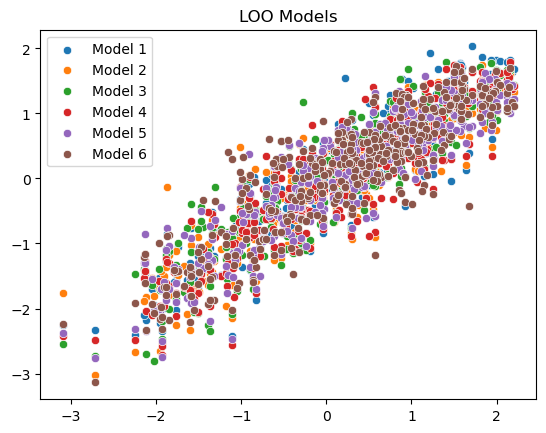

<Figure size 640x480 with 0 Axes>